In [43]:
ls /lambda_stor/homes/heng.ma/Research/covid19/nsp_rna_comp/traj_save/run_final/

eq.1.dcd     eq.2.15.dcd  eq.2.3.dcd  eq.3.0.dcd   eq.3.16.dcd  eq.3.4.dcd
eq.1.pdb     eq.2.15.pdb  eq.2.3.pdb  eq.3.0.pdb   eq.3.16.pdb  eq.3.4.pdb
eq.2.0.dcd   eq.2.16.dcd  eq.2.4.dcd  eq.3.10.dcd  eq.3.17.dcd  eq.3.5.dcd
eq.2.0.pdb   eq.2.16.pdb  eq.2.4.pdb  eq.3.10.pdb  eq.3.17.pdb  eq.3.5.pdb
eq.2.10.dcd  eq.2.17.dcd  eq.2.5.dcd  eq.3.11.dcd  eq.3.18.dcd  eq.3.6.dcd
eq.2.10.pdb  eq.2.17.pdb  eq.2.5.pdb  eq.3.11.pdb  eq.3.18.pdb  eq.3.6.pdb
eq.2.11.dcd  eq.2.18.dcd  eq.2.6.dcd  eq.3.12.dcd  eq.3.19.dcd  eq.3.7.dcd
eq.2.11.pdb  eq.2.18.pdb  eq.2.6.pdb  eq.3.12.pdb  eq.3.19.pdb  eq.3.7.pdb
eq.2.12.dcd  eq.2.19.dcd  eq.2.7.dcd  eq.3.13.dcd  eq.3.1.dcd   eq.3.8.dcd
eq.2.12.pdb  eq.2.19.pdb  eq.2.7.pdb  eq.3.13.pdb  eq.3.1.pdb   eq.3.8.pdb
eq.2.13.dcd  eq.2.1.dcd   eq.2.8.dcd  eq.3.14.dcd  eq.3.2.dcd   eq.3.9.dcd
eq.2.13.pdb  eq.2.1.pdb   eq.2.8.pdb  eq.3.14.pdb  eq.3.2.pdb   eq.3.9.pdb
eq.2.14.dcd  eq.2.2.dcd   eq.2.9.dcd  eq.3.15.dcd  eq.3.3.dcd   pre-eq.0.dcd
eq.2.14.pdb  eq.2.2.pdb

In [4]:
import MDAnalysis as mda
from pathlib import Path
import numpy as np

In [7]:
def get_positions(pdb_file, traj_file, selection: str = "protein and name CA"):
    u = mda.Universe(str(pdb_file), str(traj_file))
    atoms = u.select_atoms(selection)
    positions = np.transpose(np.array([atoms.positions.copy() for _ in u.trajectory]), [0, 2, 1])
    positions = positions[:, :, ::10]
    print(positions.shape)
    return positions

In [10]:
path = Path("/lambda_stor/homes/heng.ma/Research/covid19/nsp_rna_comp/traj_save/run_final/")

pdb_files = list(sorted(path.glob("*.pdb")))
dcd_files = list(sorted(path.glob("*.dcd")))

pdb_files = list(filter(
    lambda p: ("pre-eq.0.pdb" not in p.name) and ("eq.1.pdb" not in p.name), 
    pdb_files
))

dcd_files = list(filter(
    lambda p: ("pre-eq.0.dcd" not in p.name) and ("eq.1.dcd" not in p.name), 
    dcd_files
))

print(len(pdb_files))

save_dir = positions_dir/"run_final"
save_dir.mkdir(exists_ok=True)

In [19]:
positions_dir = Path("anda_sims_positions")
positions_dir.mkdir(exist_ok=True)

In [20]:
path = Path("/lambda_stor/homes/heng.ma/Research/covid19/nsp_rna_comp/traj_save/frontera/")
pdb_files = list(sorted(path.glob("*.pdb")))
dcd_files = list(sorted(path.glob("*.dcd")))
print(len(pdb_files))
save_dir = positions_dir/"frontera"
save_dir.mkdir(exist_ok=True)

42


In [24]:
from tqdm import tqdm
#all_positions = []
for pdb_file, traj_file in tqdm(zip(pdb_files, dcd_files)):
    positions = get_positions(pdb_file, traj_file)
    np.save(save_dir / pdb_file.with_suffix(".npy").name, positions)
    #all_positions.append(positions)
#all_positions = np.concatenate(all_positions)

1it [00:00,  1.17it/s]

(5, 3, 665)


2it [00:02,  1.30s/it]

(245, 3, 665)
(6062, 3, 665)


3it [00:18,  7.95s/it]

(6075, 3, 665)


4it [00:34, 11.28s/it]

(6074, 3, 665)


5it [00:52, 13.47s/it]

(6087, 3, 665)


6it [01:10, 15.01s/it]

(6069, 3, 665)


7it [01:27, 15.95s/it]

(6080, 3, 665)


8it [01:44, 16.14s/it]

(6114, 3, 665)


9it [02:01, 16.55s/it]

(6080, 3, 665)


10it [02:19, 16.82s/it]

(6100, 3, 665)


11it [02:39, 17.84s/it]

(6067, 3, 665)


12it [02:56, 17.72s/it]

(6068, 3, 665)


13it [03:13, 17.46s/it]

(6075, 3, 665)


14it [03:31, 17.40s/it]

(6069, 3, 665)


15it [03:47, 17.20s/it]

(6032, 3, 665)


16it [04:06, 17.70s/it]

(6067, 3, 665)


17it [04:23, 17.39s/it]

(6074, 3, 665)


18it [04:44, 18.61s/it]

(6107, 3, 665)


19it [05:03, 18.70s/it]

(6104, 3, 665)


20it [05:23, 18.90s/it]

(6074, 3, 665)


21it [05:41, 18.75s/it]

(5495, 3, 665)


22it [05:59, 18.46s/it]

(3685, 3, 665)


23it [06:11, 16.67s/it]

(3682, 3, 665)


24it [06:24, 15.60s/it]

(3368, 3, 665)


25it [06:37, 14.71s/it]

(3378, 3, 665)


26it [06:48, 13.62s/it]

(3353, 3, 665)


27it [06:59, 12.85s/it]

(3648, 3, 665)


28it [07:11, 12.47s/it]

(3428, 3, 665)


29it [07:21, 11.88s/it]

(3646, 3, 665)


30it [07:34, 12.25s/it]

(3630, 3, 665)


31it [07:45, 11.78s/it]

(3577, 3, 665)


32it [07:59, 12.52s/it]

(3360, 3, 665)


33it [08:11, 12.29s/it]

(3366, 3, 665)


34it [08:21, 11.72s/it]

(3577, 3, 665)


35it [08:35, 12.19s/it]

(3337, 3, 665)


36it [08:46, 11.79s/it]

(3345, 3, 665)


37it [08:55, 11.15s/it]

(3415, 3, 665)


38it [09:05, 10.64s/it]

(3406, 3, 665)


39it [09:15, 10.41s/it]

(3453, 3, 665)


40it [09:25, 10.41s/it]

(3330, 3, 665)


41it [09:35, 10.25s/it]

(3349, 3, 665)


42it [09:44, 13.92s/it]


In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("ns_per_day.csv")

In [55]:
df.describe()

,ns_per_day,mean_time_per_step,stdev_time_per_step
count,760.000000,760.000000,760.000000
mean,17.944571,0.009630,0.000286
std,0.065250,0.000035,0.000178
min,17.565126,0.009556,0.000144
25%,17.911084,0.009605,0.000199
50%,17.949566,0.009627,0.000255
75%,17.991094,0.009648,0.000304
max,18.083151,0.009838,0.002300


array([[<AxesSubplot:title={'center':'ns_per_day'}>,
        <AxesSubplot:title={'center':' mean_time_per_step'}>],
       [<AxesSubplot:title={'center':' stdev_time_per_step'}>,
        <AxesSubplot:>]], dtype=object)

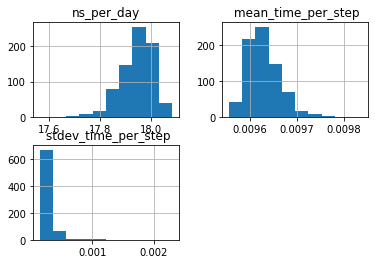

In [56]:
df.hist()

In [ ]:
# Get aggreagete number of ns (total simulation time)
# Compare theoretical max of ns output to what our workflow produced
# Max would be median ns_per_day by how long it was running